In [89]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [99]:
'''
Dataset columns

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1, whether or not the patient had diabetes)
'''
data_set_1 = pd.read_csv("dataset1_diabetes.csv")
data_set_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [152]:
# Количество пропусков
data_set_1.isnull().sum()

Glucose          0
BloodPressure    0
BMI              0
Age              0
Diabetes         0
dtype: int64

In [103]:
data_set_1_mask = data_set_1.duplicated(subset=list(data_set_1.columns))
data_set_1_duplicates = data_set_1[data_set_1_mask].size
print("Количество дубликатов:", data_set_1_duplicates)

Количество дубликатов: 0


В первом датасете 768 записей, 9 признаков. Пропусков нет, дублей нет.

<AxesSubplot: >

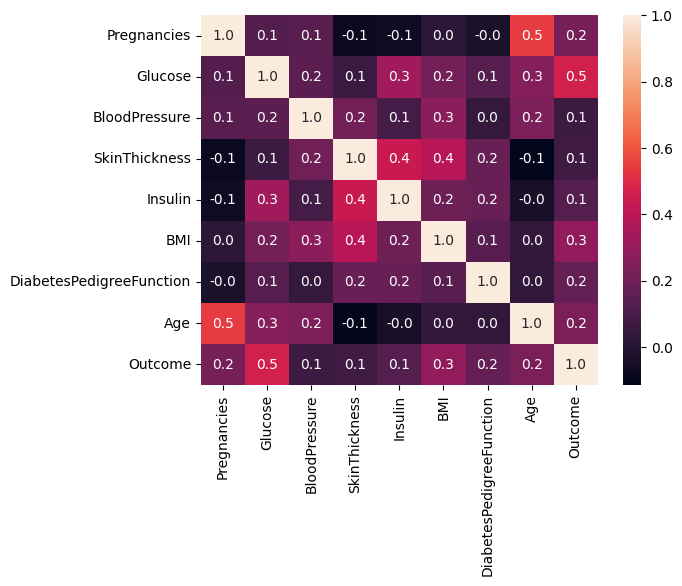

In [112]:
sns.heatmap(data_set_1.corr(), annot=True, fmt=".1f")

По графику корреояций между признаками видим, что на Outcome больше всего влияет показатель глюкозы. 
Таже определённое влияние оказывают показатели Индекса Массы Тела (ИМТ), количество беременностей и возраст.

Из интересного, видим связь возраста и количества беременностей. Таже заметно, что толщена кожи связана с ИМТ и инсулином. Также инсулин имеет зависимость от глюкозы.

<AxesSubplot: xlabel='Glucose', ylabel='Outcome'>

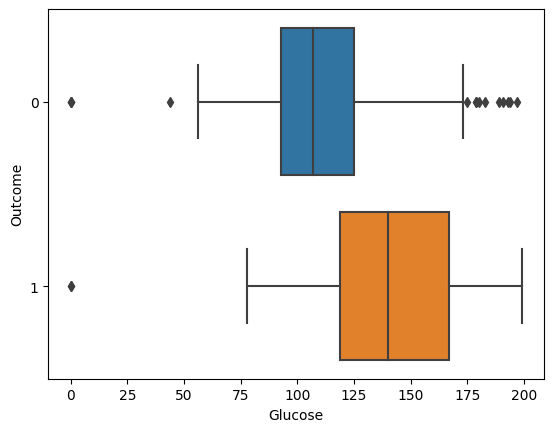

In [115]:
sns.boxplot(data_set_1, x='Glucose', y='Outcome', orient='h')

И действительно, видим что у людей с высокой глюкозой с большой вероятностью будет диабет. Это и логично, так как при сахарном диабете хронически повышается уровень глюкозы в крови.

<AxesSubplot: xlabel='Age', ylabel='Pregnancies'>

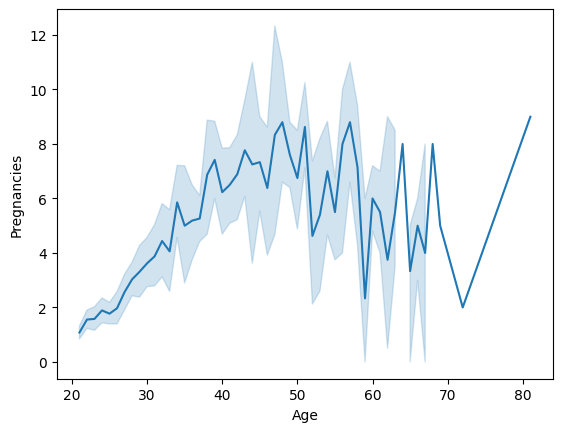

In [136]:
sns.lineplot(data_set_1, x='Age', y='Pregnancies')

Связь возраста и количества беременностей объясняется тем, что чем дольше человек живёт, тем больше у него возможных беременностей.

Теперь добавим второй датасет.

In [187]:
'''
Dataset columns

Demographic:
• Sex: male or female("M" or "F")
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)
Predict variable (desired target)
• 10 year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
'''
data_set_2_train = pd.read_csv("dataset2_train.csv")
data_set_2_test = pd.read_csv("dataset2_test.csv")
# Объединяем оба датасета в один
data_set_2 = pd.concat([data_set_2_train, data_set_2_test], ignore_index = True)
data_set_2

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,4233,46,3.0,F,NO,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0,NaN
4234,4234,58,2.0,F,NO,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0,NaN
4235,4235,55,1.0,M,NO,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN,NaN
4236,4236,45,3.0,F,NO,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0,NaN


In [154]:
# Количество пропусков
data_set_2.isnull().sum()

id                   0
age                  0
education          105
sex                  0
is_smoking           0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD         848
dtype: int64

In [188]:
data_set_2_mask = data_set_2.duplicated(subset=list(data_set_2.columns))
data_set_2_duplicates = data_set_2[data_set_2_mask].size
print("Количество дубликатов:", data_set_2_duplicates)

Количество дубликатов: 0


Во втором датасете 4238 записей, 17 признаков. Записи с пропусками есть, дублей нет. 
Записи с пропусками ммы удалим позже, так как не все признаки нам пригодятся в дальнейшем.

In [189]:
# Ищем общие признаки в колонках
print(data_set_1.columns) # Glucose, BloodPressure, BMI, Age, Outcome
print(data_set_2.columns) # glucose, diaBP, BMI, age, diabetes

# Переименовываем Outcome из первого датасета в более читаемое Diabetes
data_set_1.rename(
    columns = {
            'Outcome':'Diabetes',
        }, 
    inplace = True
)
data_set_1 = data_set_1.loc[:,["Glucose","BloodPressure","BMI","Age","Diabetes"]]

# переименовываем колонки из второго датасета в соответствуещие из первого датасета
data_set_2.rename(
    columns = {
            'glucose':'Glucose',
            'diaBP':'BloodPressure',
            'age':'Age',
            'diabetes':'Diabetes',
        }, 
    inplace = True
 )
data_set_2 = data_set_2.loc[:,["Glucose","BloodPressure","BMI","Age","Diabetes"]]

# Объединяем датасеты
data_set_result = pd.concat([data_set_1, data_set_2], ignore_index = True)
# Удаляем записи с пропусками
data_set_result = data_set_result.dropna()
data_set_result

Index(['Glucose', 'BloodPressure', 'BMI', 'Age', 'Diabetes'], dtype='object')
Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


,Glucose,BloodPressure,BMI,Age,Diabetes
0,148.0,72.0,33.60,50,1
1,85.0,66.0,26.60,31,0
2,183.0,64.0,23.30,32,1
3,89.0,66.0,28.10,21,0
4,137.0,40.0,43.10,33,1
...,...,...,...,...,...
5000,83.0,91.0,24.30,49,0
5001,77.0,77.5,27.42,46,0
5002,70.0,67.0,23.08,58,0
5004,92.0,104.5,22.86,45,0


В результате получился датасет с 4604 записями и 5 признаками.

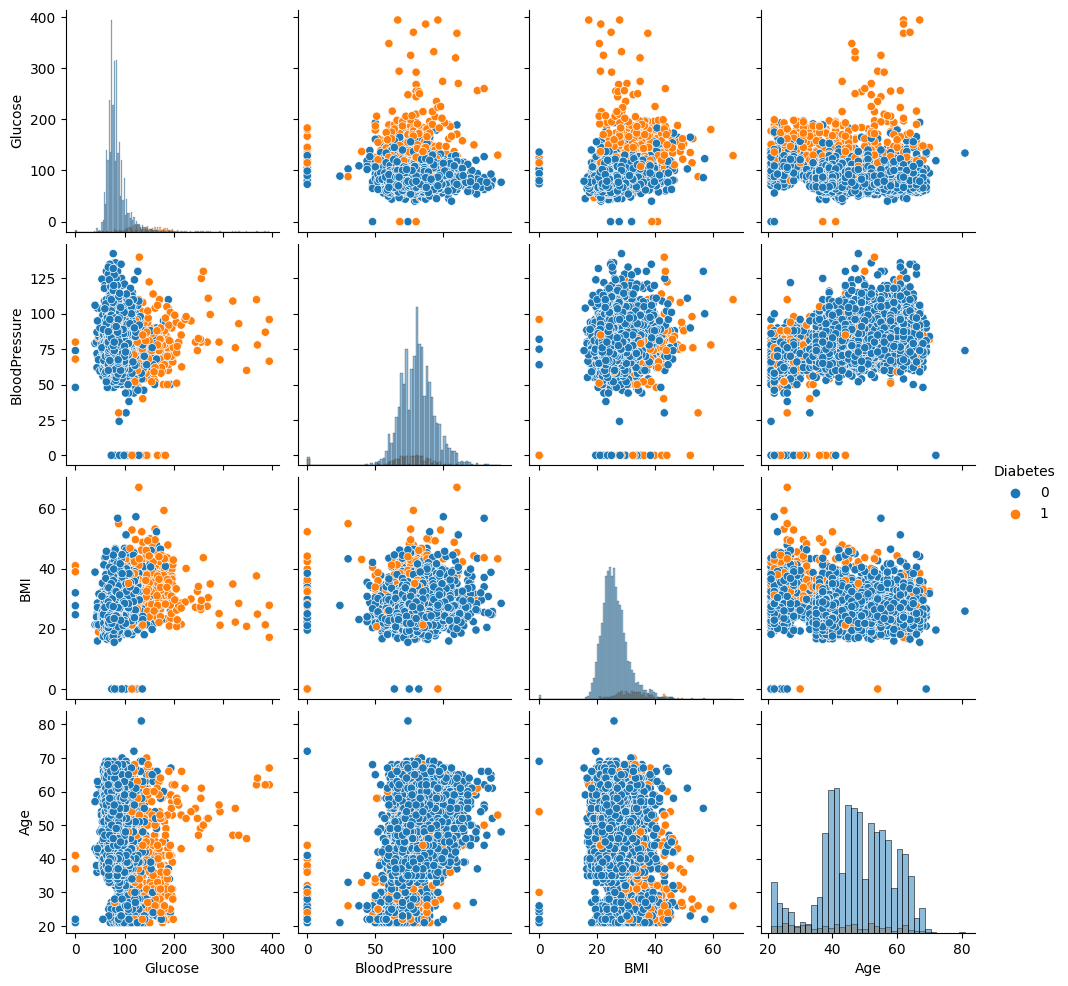

In [190]:
sns.pairplot(data_set_result, hue='Diabetes', diag_kind='hist')

Обращаем внимание на то, что в первую очередь на наличие диабета влияет повышенных уровень глюкозы.
Также прослеживается влияние высокого ИМТ на наличие диабета.

<AxesSubplot: xlabel='Glucose', ylabel='Count'>

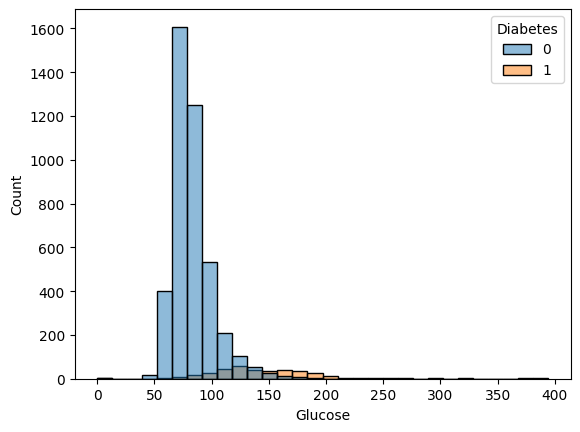

In [175]:
sns.histplot(data_set_result, x='Glucose', hue='Diabetes', bins=30)

Подтверждаем увеличенную глюкозу у диабетиков.

Добавим третий датасет.

In [195]:
'''
Dataset columns

Diabetes_012: 0 = no diabetes 1 = prediabetes 2 = diabetes
Diabetes_binary: 0 = no diabetes 1 = diabetes
HighBP: 0 = no high BP 1 = high BP
HighChol: 0 = no high cholesterol 1 = high cholesterol
CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
BMI: Body Mass Index
Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
Stroke: (Ever told) you had a stroke. 0 = no 1 = yes
HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes
Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes
Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes
HvyAlcoholConsump: (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes
AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
MentHlth: days of poor mental health scale 1-30 days
PhysHlth: physical illness or injury days in past 30 days scale 1-30
DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
Sex: 0 = female 1 = male
Age: 13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older
Education: Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = elementary etc.
Income: Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more
'''
data_set_3_1 = pd.read_csv("dataset3_diabetes_012_health_indicators_BRFSS2015.csv")

# Конвертируем признак наличия диабета у первого под-датасета
def convert_012_to_binary(value_012: int) -> int:
    """Converts Diabetes_012 to Diabetes_binary:
    0 and 1 -> 0
    2       -> 1"""
    return 0 if value_012 < 2 else 1
data_set_3_1['Diabetes_012'] = data_set_3_1['Diabetes_012'].apply(convert_012_to_binary)

data_set_3_1.rename(
    columns = {
            'Diabetes_012':'Diabetes_binary',
        }, 
    inplace = True
    )
data_set_3_2 = pd.read_csv("dataset3_diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
data_set_3_3 = pd.read_csv("dataset3_diabetes_binary_health_indicators_BRFSS2015.csv")
# Объединяем три под-датасета
data_set_3 = pd.concat([data_set_3_1, data_set_3_2, data_set_3_3], ignore_index = True)
data_set_3

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578047,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
578048,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
578049,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
578050,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [196]:
# Количество пропусков
data_set_3.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [197]:
data_set_2_mask = data_set_2.duplicated(subset=list(data_set_2.columns))
data_set_2_duplicates = data_set_2[data_set_2_mask].size
print("Количество дубликатов:", data_set_2_duplicates)

Количество дубликатов: 0


В третьем датасете 578052 записей, 22 признака. Записей с пропусками нет, дублей нет.

In [193]:
def convert_age_to_AGEG5YR(age: int) -> int:
    """Converts age to _AGEG5YR:
    1	Age 18 - 24
    2	Age 25 to 29
    3	Age 30 to 34
    4	Age 35 to 39
    5	Age 40 to 44
    6	Age 45 to 49
    7	Age 50 to 54
    8	Age 55 to 59
    9	Age 60 to 64
    10	Age 65 to 69
    11	Age 70 to 74
    12	Age 75 to 79
    13	Age 80 or older
    other - unknown
    """
    if age >= 18 and age <= 24:
        return 1
    elif age >= 25 and age <= 29:
        return 2
    elif age >= 30 and age <= 34:
        return 3
    elif age >= 35 and age <= 39:
        return 4
    elif age >= 40 and age <= 44:
        return 5
    elif age >= 45 and age <= 49:
        return 6
    elif age >= 50 and age <= 54:
        return 7
    elif age >= 55 and age <= 59:
        return 8
    elif age >= 60 and age <= 64:
        return 9
    elif age >= 65 and age <= 69:
        return 10
    elif age >= 70 and age <= 74:
        return 11
    elif age >= 75 and age <= 79:
        return 12
    elif age >= 80:
        return 13
    else:
        return None

def convert_diastolic_bp_to_high_bp(dia_bp: float) -> int:
    """Converts diastolic blood presure to:
    1 - if bp is high
    0 - otherwise"""
    return 1 if dia_bp > 90.0 else 0

# Конвертируем первый датасет под нужный формат
data_set_result['Age'] = data_set_result['Age'].apply(convert_age_to_AGEG5YR).astype(int)
data_set_result['BloodPressure'] = data_set_result['BloodPressure'].apply(convert_diastolic_bp_to_high_bp).astype(int)
data_set_result.rename(
    columns = {
            'BloodPressure':'HighBP',
        }, 
    inplace = True
)

# Конвертируем третий датасет в нужный формат
data_set_3['HighBP'] = data_set_3['HighBP'].astype(int)
data_set_3['Age'] = data_set_3['Age'].astype(int)
data_set_3.rename(
    columns = {
            'Diabetes_binary':'Diabetes',
        }, 
    inplace = True
)
data_set_3 = data_set_3.loc[:,["HighBP","BMI","Age","Diabetes"]]

# Объединяем третий датасет с первым и вторым
data_set_result = data_set_result.loc[:,["HighBP","BMI","Age","Diabetes"]]
data_set_result = pd.concat([data_set_result, data_set_3], ignore_index = True)
data_set_result

,HighBP,BMI,Age,Diabetes
0,0,33.6,7,1.0
1,0,26.6,3,0.0
2,0,23.3,3,1.0
3,0,28.1,1,0.0
4,0,43.1,3,1.0
...,...,...,...,...
582651,1,45.0,5,0.0
582652,1,18.0,11,1.0
582653,0,28.0,2,0.0
582654,1,23.0,7,0.0


Итоговый датасет содержит 582656 и 4 признака.

<AxesSubplot: >

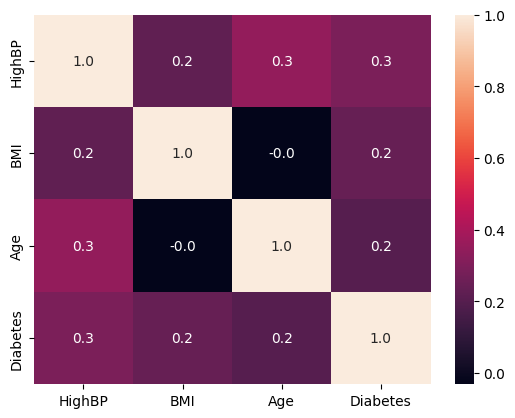

In [87]:

sns.heatmap(data_set_result.corr(), annot=True, fmt=".1f")

С маленьким набором признаков стало сложнее выделить конкретную причину диабета. Также, глюкоза - основной признак - ушла.
Самая яркая связь - возраст и повышенное давление.
Больше всего влияет на диабет - повышенное давление.

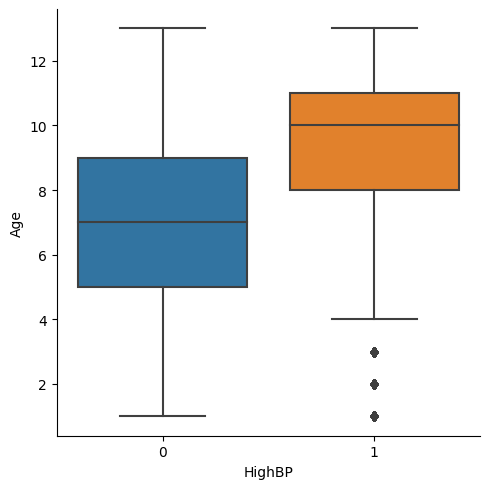

In [186]:
sns.catplot(data_set_result, x='HighBP', y='Age', kind='box')

Видно, что с увеличением возраста растёт и вероятность повышенного давления.